In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")

In [2]:
def timber(in_arr, head, tail):
    if head == tail:
        return in_arr[head]
    return sum(in_arr[head:tail+1]) - min(timber(in_arr, head+1, tail), timber(in_arr, head, tail-1))

In [3]:
def timber_BU(in_arr, head, tail):
    # init memory
    mem = [[in_arr[row] if row == col else 0 for row in range(tail+1)] for col in range(tail+1)]
    # starting j
    start_j = 1
    while start_j < tail+1:
        # this work that i reset to 0 every time, go back to the top row
        # while j only restart where j where originally with one step a head
        j = start_j
        i = 0
        while i < tail+1 and j < tail+1:
            # relation
            if i != j and i < j:
                mem[i][j] = sum(in_arr[i:j+1]) - min(mem[i+1][j], mem[i][j-1])
            # move both j and i
            j += 1
            i += 1
        # move the next diagonal rows on the next columns
        start_j += 1
        # return result from desired input
    return mem[head][tail]

In [12]:
def perform_test(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        print(f"done iter: {i}")

    return time_arr, iter_arr

done iter: 1
done iter: 2
done iter: 3
done iter: 4
done iter: 5
done iter: 6
done iter: 7
done iter: 8
done iter: 9
done iter: 10
done iter: 11
done iter: 12
done iter: 13
done iter: 14
done iter: 15
done iter: 16
done iter: 17
done iter: 18
done iter: 19
done iter: 20
done iter: 21
done iter: 22
done iter: 23
done iter: 24
done iter: 25


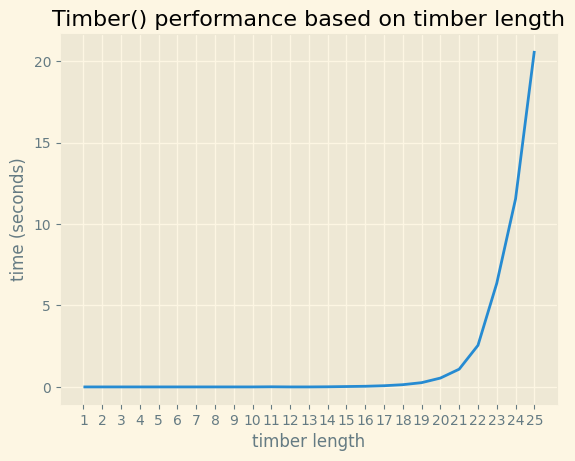

In [15]:
time_arr, iter_arr = perform_test(25, 1)
# plot
plt.plot(iter_arr, time_arr)
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")
plt.show()

In [6]:
def perform_test_BU(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber_BU(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        print(f"done iter: {i}")

    return time_arr, iter_arr

done iter: 100
done iter: 200
done iter: 300
done iter: 400
done iter: 500
done iter: 600
done iter: 700
done iter: 800
done iter: 900
done iter: 1000
done iter: 1100
done iter: 1200
done iter: 1300
done iter: 1400
done iter: 1500
done iter: 1600
done iter: 1700
done iter: 1800
done iter: 1900
done iter: 2000


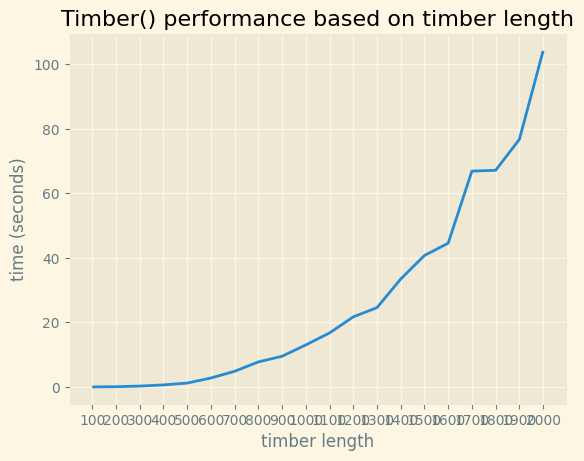

In [9]:
time_arr, iter_arr = perform_test_BU(2000, 100)
# plot
plt.plot(iter_arr, time_arr)
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")
plt.show()

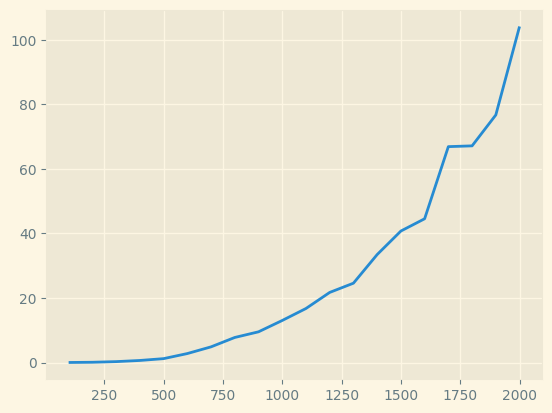

In [10]:
plt.plot(iter_arr, time_arr)
plt.show()